# Fetching Tweets using Tweepy

### Import Libraries

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 KB 3.5 MB/s eta 0:00:00


In [ ]:
import tweepy
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
stop = stopwords.words('english')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
import re
import matplotlib.pyplot as plt
from matplotlib.cm import Reds, Greens, Purples, Greys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import time

In [ ]:
ACCESS_TOKEN = '' # Access token
ACCESS_SECRET = '' # Access Secret
CONSUMER_KEY = '' # consumer key
CONSUMER_SECRET = '' # consumer secret

import tweepy

def connect_to_twiiter_OAuth():
  auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
  auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)

  api = tweepy.API(auth)
  return api


api = connect_to_twiiter_OAuth()



# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

In [ ]:
# Define the tweet text
tweet='this is an automated test tweet using tweepy from NLP course tet'

# Generate text tweet
api.update_status(tweet)

#### Getting Tweets from different ipl currencies

In [ ]:
ipl_list={'@RCBTweets','@mipaltan','@ChennaiIPL', '@GujTitansIPL', '@PunjabKingsIPL', '@LucknowIPL', '@Thisisnewdelhi'}

In [ ]:
# Array to hold tweet data
tweet_list = []
# Iterate through all the ipl_list
for ipl in ipl_list:
    # Bring out the 300 tweets
    ipl_tweets = api.user_timeline(ipl, count=300)
    time.sleep(1)
    # Loop through the 300 tweets
    for tweet in ipl_tweets:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'ipl':ipl,
                          'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
        

In [ ]:
tweet_data=pd.DataFrame(tweet_list)

In [ ]:
tweet_data.head()

ipl             tweet_id  \
0  @mipaltan  1621488336761393155   
1  @mipaltan  1621484633249714177   
2  @mipaltan  1621460732905951232   
3  @mipaltan  1621393043185348608   
4  @mipaltan  1621389268487901186   

                                                text  favorite_count  \
0  The ùöëùöéùöõùöò from the final over of 2007 T20 World...             511   
1  The moment that'll forever be etched in our he...             515   
2  ¬©Ô∏èaptain RO en route Nagpur for #BGT ‚úàÔ∏è\n\n#On...            2447   
3  üó£Ô∏è Our Head Coach @markb46 on the üáøüá¶ stars who...             442   
4  üí™ Tim bhau at it, this time with his bowling üëå...            1013   

   retweet_count          created_at           source  reply_to_status  \
0             29 2023-02-03 12:38:39  Twitter Web App              NaN   
1             30 2023-02-03 12:23:56  Twitter Web App              NaN   
2            137 2023-02-03 10:48:58  Twitter Web App              NaN   
3             21 2023-02-03 06:20:00  Twitter Web App              NaN   
4             38 2023-02-03 06:05:00  Twitter Web App              NaN   

  reply_to_user  retweets  favorites  
0          None        29        511  
1          None        30        515  
2          None       137       2447  
3          None        21        442  
4          None        38       1013

In [ ]:
tweet_data.shape

(1300, 11)

In [ ]:
tweet_data.to_csv('Tweets.csv',index=None)

## Exploring the Data

In [ ]:
data=tweet_data.copy()

In [ ]:
source=data.source.value_counts()

In [ ]:
trace=go.Pie(labels=source.index,values=source,showlegend=False,hole=0.33,text=[str(round(i*100,3))+'%' for i in source/sum(source)],hovertext='Source',
            hoverinfo='label+text',textinfo='text+label'
            )
layout=go.Layout(title="Which Device People are using?")
fig=go.Figure(data=[trace],layout=layout)
fig.show()

##### Observation:
- People prefer TweetDeck or Web App. 

#### Most Retweets and Favorites

In [ ]:
source=data.groupby('ipl').agg(sum)[['retweet_count','favorite_count']]

In [ ]:
fig=go.Figure()
fig.add_bar(x=source.index,y=source.retweet_count,name='Retweet Count')
fig.add_bar(x=source.index,y=source.favorite_count,name='Favorite Count')

In [ ]:
data.head()

ipl             tweet_id  \
0  @mipaltan  1621488336761393155   
1  @mipaltan  1621484633249714177   
2  @mipaltan  1621460732905951232   
3  @mipaltan  1621393043185348608   
4  @mipaltan  1621389268487901186   

                                                text  favorite_count  \
0  The ùöëùöéùöõùöò from the final over of 2007 T20 World...             511   
1  The moment that'll forever be etched in our he...             515   
2  ¬©Ô∏èaptain RO en route Nagpur for #BGT ‚úàÔ∏è\n\n#On...            2447   
3  üó£Ô∏è Our Head Coach @markb46 on the üáøüá¶ stars who...             442   
4  üí™ Tim bhau at it, this time with his bowling üëå...            1013   

   retweet_count          created_at           source  reply_to_status  \
0             29 2023-02-03 12:38:39  Twitter Web App              NaN   
1             30 2023-02-03 12:23:56  Twitter Web App              NaN   
2            137 2023-02-03 10:48:58  Twitter Web App              NaN   
3             21 2023-02-03 06:20:00  Twitter Web App              NaN   
4             38 2023-02-03 06:05:00  Twitter Web App              NaN   

  reply_to_user  retweets  favorites  
0          None        29        511  
1          None        30        515  
2          None       137       2447  
3          None        21        442  
4          None        38       1013

#### Most used Hashtags

In [ ]:
def hashtag_extract(x):
    hashtags = []
    ht = re.findall(r"#(\w+)", x)
    hashtags.extend(ht)
    if hashtags==[]:
        return ''
    return hashtags

In [ ]:
tags=[hashtag_extract(x) for  x in data.text]

In [ ]:
all_tags=[]
for tag in tags:
    if tag!='':
        all_tags.extend(tag)

In [ ]:
tags_vc={tag:0 for tag in set(all_tags)}

In [ ]:
for tweet in data.text:
    ht = re.findall(r"#(\w+)", tweet)
    if ht!=[]:
        for tag in ht:
            tags_vc[tag]+=1

In [ ]:
tags_vc_sorted=dict(sorted(tags_vc.items(),key= lambda x:x[1],reverse=True))

In [ ]:
tags_vc_sorted

{'INDvNZ': 274,
 'OneFamily': 124,
 'TeamIndia': 120,
 'WhistlePodu': 118,
 'PlayBold': 92,
 'LucknowSuperGiants': 87,
 'LSG': 84,
 'IPLAuction': 62,
 'Yellove': 41,
 'PunjabKings': 40,
 'IPL2023': 39,
 'iplt20livecricket': 37,
 'TATAIPL': 36,
 'AavaDe': 34,
 'GujaratTitans': 34,
 'ipl': 33,
 'INDvSL': 31,
 'SuperFam': 31,
 'U19T20WorldCup': 28,
 'iplt20score': 28,
 'iplscore': 28,
 'ipllivescore': 27,
 'OnThisDay': 26,
 'RanjiTrophy': 26,
 'iplt20livecricketscore': 25,
 'SaddaPunjab': 19,
 'ipllivematch': 19,
 'Whistle4Blue': 19,
 'SuperGiant': 16,
 'SherSquad': 16,
 'DD': 16,
 'iplt20': 14,
 'RPSvDD': 12,
 'IPL2022': 12,
 'DDvSRH': 11,
 'IPL': 10,
 'SuperGiants': 10,
 'ipl9': 10,
 'DDvRPS': 10,
 'ipllivecricket': 8,
 'IPLFinal': 8,
 'ShubmanGill': 7,
 'BhaukaalMachaDenge': 6,
 'DDvKKR': 6,
 'RohitSharma': 6,
 'SA20': 5,
 'DDvMI': 5,
 'RCB': 5,
 'DSG': 5,
 'iplt20live': 5,
 'RCBvDD': 5,
 'SeasonOfFirsts': 5,
 'IPL2017': 5,
 'GTvRR': 4,
 'MumbaiIndians': 4,
 'TheRoarStartsHere': 4,
 'A

## Cleaning the Tweet Data

#### Removing user handle 

In [ ]:
# removing user handle 
data['tidy_tweet'] = data['text'].replace(to_replace ='(@[\w]+)', value ='', regex = True) 
data['tidy_tweet'] = data['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True) 

In [ ]:
# Before
tweet_data['text'][:2]

0    The ùöëùöéùöõùöò from the final over of 2007 T20 World...
1    The moment that'll forever be etched in our he...
Name: text, dtype: object

In [ ]:
# After
data['tidy_tweet'][:2]

0    The ùöëùöéùöõùöò from the final over of 2007 T20 World...
1    The moment that'll forever be etched in our he...
Name: tidy_tweet, dtype: object

#### Remove any links from the tweet

In [ ]:
#remove any links from the tweet: Links not required for performing sentiment analysis.
data['tidy_tweet'] = data['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)

In [ ]:
# Before
tweet_data['text'][3]

'üó£Ô∏è Our Head Coach @markb46 on the üáøüá¶ stars who will be in action soon, in #MumbaiIndians Blue &amp; Gold üíôüëä\n\n#OneFamily‚Ä¶ https://t.co/OxHLSbWpcf'

In [ ]:
# After
data['tidy_tweet'][3]

'üó£Ô∏è Our Head Coach  on the üáøüá¶ stars who will be in action soon, in #MumbaiIndians Blue &amp; Gold üíôüëä\n\n#OneFamily‚Ä¶ \x00'

#### Remove special characters, numbers, punctuations:

In [ ]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z]+", " ")

<ipython-input-39-bad412b6a610>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
data['tidy_tweet'][0]

'The from the final over of T World Cup bids adieu to all forms of cricket Happy retirement '

In [ ]:
tweet_data.text[0]

'The ùöëùöéùöõùöò from the final over of 2007 T20 World Cup bids adieu to all forms of cricket! üëè\n\nHappy retirement,‚Ä¶ https://t.co/enjSWuiWnT'

#### Tokenising and removing Stop Words

In [ ]:
data["tidy_tweet"] = data["tidy_tweet"].str.lower()
data["tidy_tweet"] = data["tidy_tweet"].str.split()
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
data.text[0]

'The ùöëùöéùöõùöò from the final over of 2007 T20 World Cup bids adieu to all forms of cricket! üëè\n\nHappy retirement,‚Ä¶ https://t.co/enjSWuiWnT'

In [ ]:
# After
data['tidy_tweet'][0]

['final',
 'world',
 'cup',
 'bids',
 'adieu',
 'forms',
 'cricket',
 'happy',
 'retirement']

In [ ]:
#Alternate Method: Using TweetTokenizer to tokenize the tweet
tt = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tt.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [ ]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

data['tidy_tweet'] = data.apply(rejoin_words, axis=1)


In [ ]:
data['tidy_tweet'][1]

'moment forever etched hearts courtesy jogindersharma thank memories'

#### Applying Lemmatization

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['tidy_tweet'] = data['tidy_tweet'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['tidy_tweet']

0       [final, world, cup, bid, adieu, form, cricket,...
1       [moment, forever, etched, heart, courtesy, jog...
2       [aptain, ro, en, route, nagpur, bgt, onefamily...
3       [head, coach, star, action, soon, mumbaiindian...
4                   [tim, bhau, time, bowling, onefamily]
                              ...                        
1295    [siraj, strike, henry, nicholls, fall, tourist...
1296    [finn, allen, fall, duck, shami, first, great,...
1297                [action, begun, shami, start, indvnz]
1298           [shersquad, happy, decision, toss, indvnz]
1299    [toss, update, teamindia, toss, elected, field...
Name: tidy_tweet, Length: 1300, dtype: object

In [ ]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

data['tidy_tweet'] = data.apply(rejoin_words, axis=1)

In [ ]:
data['tidy_tweet']

0       final world cup bid adieu form cricket happy r...
1       moment forever etched heart courtesy joginders...
2         aptain ro en route nagpur bgt onefamily indvaus
3       head coach star action soon mumbaiindians blue...
4                         tim bhau time bowling onefamily
                              ...                        
1295    siraj strike henry nicholls fall tourist press...
1296    finn allen fall duck shami first great start i...
1297                      action begun shami start indvnz
1298                 shersquad happy decision toss indvnz
1299    toss update teamindia toss elected field first...
Name: tidy_tweet, Length: 1300, dtype: object

#### Function for Cleaning

In [ ]:
# This will only be used in for single tweet
def rejoin_words_text(row):
    my_list = row['Text']
    joined_words = ( " ".join(my_list))
    return joined_words

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def cleanText(text):
    text = pd.DataFrame({'Orig':[text]})
    text['Text'] = text.Orig.replace(to_replace ='(@[\w]+)', value ='', regex = True) 
    text.Text = text.Text.replace(to_replace =('RT'), value ='',regex = True) 
    text.Text = text.Text.str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
    text.Text = text.Text.str.replace("[^a-zA-Z]+", " ")
    text.Text = text.Text.str.lower()
    text.Text = text.Text.str.split()
    text.Text = text.Text.apply(lambda x: [item for item in x if item not in stop])
    text.Text = text.apply(rejoin_words_text, axis=1)
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text.Text = text.Text.apply(lemmatize_text)
    text.Text = text.apply(rejoin_words_text, axis=1)
    return text.Text[0]

### Check the Sentiment using VADER

Read more at: https://github.com/cjhutto/vaderSentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
out={'neg':[],'neu':[],'pos':[],'compound':[]}

In [ ]:
for i in range(data.shape[0]):
    vader_out=analyzer.polarity_scores(data.tidy_tweet[i])
    for key in vader_out.keys():
        out[key].append(vader_out[key])

In [ ]:
out.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [ ]:
for key in out.keys():
    data[key]=out[key]

In [ ]:
source=data.groupby('ipl').agg('mean')

In [ ]:
source

tweet_id  favorite_count  retweet_count  reply_to_status  \
ipl                                                                             
@ChennaiIPL      1.617456e+18     3736.310000     241.720000     1.617795e+18   
@GujTitansIPL    1.544876e+18        8.125000      86.195000     1.540186e+18   
@LucknowIPL      1.610863e+18      746.905000      80.160000     1.606775e+18   
@PunjabKingsIPL  1.618931e+18      446.720000      22.420000     1.620070e+18   
@RCBTweets       1.617173e+18     4132.433673     213.653061     1.617535e+18   
@Thisisnewdelhi  8.289538e+17        0.788462      60.269231              NaN   
@mipaltan        1.619460e+18     1048.870000      53.595000     1.619805e+18   

                   retweets    favorites       neg       neu       pos  \
ipl                                                                      
@ChennaiIPL      241.720000  3736.310000  0.011855  0.792730  0.165420   
@GujTitansIPL     86.195000     8.125000  0.032230  0.723465  0.139305   
@LucknowIPL       80.160000   746.905000  0.012960  0.795120  0.141910   
@PunjabKingsIPL   22.420000   446.720000  0.042685  0.813810  0.128500   
@RCBTweets       213.653061  4132.433673  0.020367  0.784786  0.189745   
@Thisisnewdelhi   60.269231     0.788462  0.003346  0.950135  0.046519   
@mipaltan         53.595000  1048.870000  0.019215  0.834540  0.106250   

                 compound  
ipl                        
@ChennaiIPL      0.218478  
@GujTitansIPL    0.114513  
@LucknowIPL      0.178205  
@PunjabKingsIPL  0.130513  
@RCBTweets       0.259801  
@Thisisnewdelhi  0.058813  
@mipaltan        0.120289

In [ ]:
source=data.groupby('ipl').agg('mean')
fig=go.Figure()
for ipl in data.ipl.unique():
    fig.add_bar(x=['Negative','Neutral','Positive','Compound'],y=list(source[source.index==ipl][out.keys()].values[0]),name=ipl)
fig.update_layout(title='Average Sentiment Across type of iplcurrencies')
fig.show()

#### Wordcloud based on the hashtags

In [ ]:
def word_cloud(wd_list,color):
    plt.figure(figsize=(10,15))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(max_font_size=None,stopwords=stopwords, background_color='#fcf4ee', collocations=False,colormap =color,
                  width=750, height=750).generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [ ]:
tweet_data[tweet_data['ipl']=="@RCBTweets"]

ipl             tweet_id  \
200  @RCBTweets  1621516734346964995   
201  @RCBTweets  1621487453600366592   
202  @RCBTweets  1621473483116138496   
203  @RCBTweets  1621426254116450306   
204  @RCBTweets  1621396183921852418   
..          ...                  ...   
391  @RCBTweets  1613090839340716034   
392  @RCBTweets  1613034753976074241   
393  @RCBTweets  1613027553912172547   
394  @RCBTweets  1613015341424168960   
395  @RCBTweets  1613000241900290048   

                                                  text  favorite_count  \
200  It's safe to say you‚Äôll see more of the same f...             566   
201  This is most of us, everytime we see a üê∂/üêà \n\...            3046   
202  Preparations for #INDvAUS underway! ‚ö°\n\n#Play...             938   
203  #OnThisDay in 2013, @ABdeVilliers17 scored an ...            1609   
204  #OnThisDay in 2019, üáÆüá≥ completed their first O...            1441   
..                                                 ...             ...   
391  #OnThisDay in 2015, 4Ô∏è‚É£6Ô∏è‚É£7Ô∏è‚É£ runs were scored...            1746   
392  #OnThisDay in 2010, Virat Kohli won his first ...            5799   
393  #PlayBold #TeamIndia¬†#INDvSL https://t.co/NRWg...            1231   
394  ùó¶ùó°ùóîùó£ùó¶ùóõùó¢ùóßùó¶ üì∏\n\nAn aggressive start by the üáÆüá≥ o...            3640   
395  Here's wishing one of the greatest torchbearer...            3822   

     retweet_count          created_at              source  reply_to_status  \
200             38 2023-02-03 14:31:30  Twitter for iPhone              NaN   
201            139 2023-02-03 12:35:09  Twitter for iPhone              NaN   
202             40 2023-02-03 11:39:38  Twitter for iPhone              NaN   
203             80 2023-02-03 08:31:58  Twitter for iPhone              NaN   
204             42 2023-02-03 06:32:28  Twitter for iPhone              NaN   
..             ...                 ...                 ...              ...   
391             51 2023-01-11 08:30:00     Twitter Web App              NaN   
392            240 2023-01-11 04:47:08     Twitter Web App              NaN   
393             34 2023-01-11 04:18:32     Twitter Web App     1.613015e+18   
394            176 2023-01-11 03:30:00     Twitter Web App              NaN   
395            198 2023-01-11 02:30:00     Twitter Web App              NaN   

    reply_to_user  retweets  favorites  
200          None        38        566  
201          None       139       3046  
202          None        40        938  
203          None        80       1609  
204          None        42       1441  
..            ...       ...        ...  
391          None        51       1746  
392          None       240       5799  
393     RCBTweets        34       1231  
394          None       176       3640  
395          None       198       3822  

[196 rows x 11 columns]

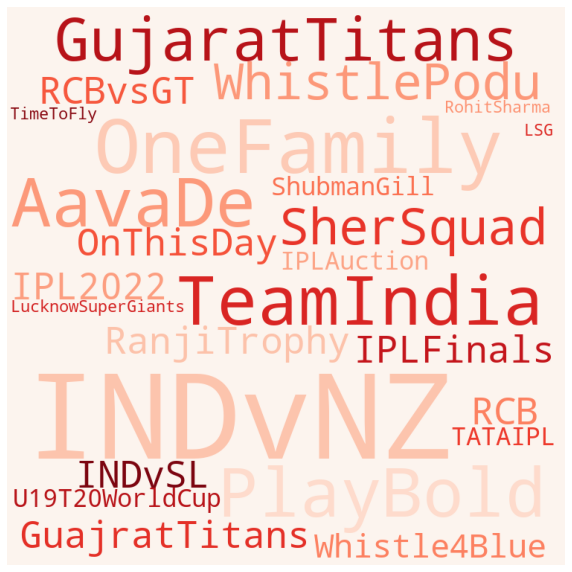

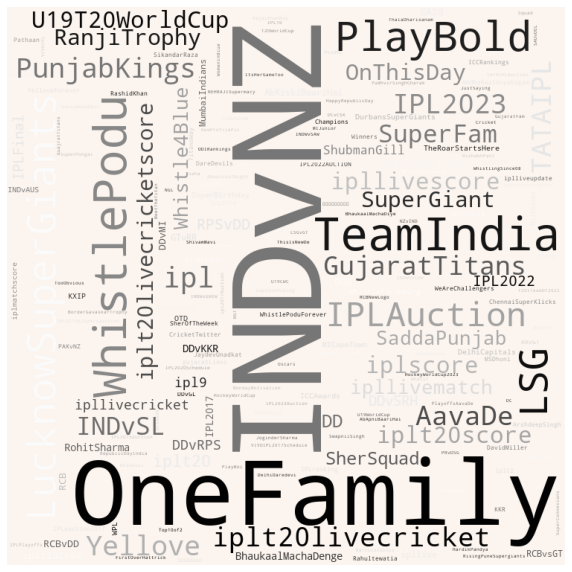

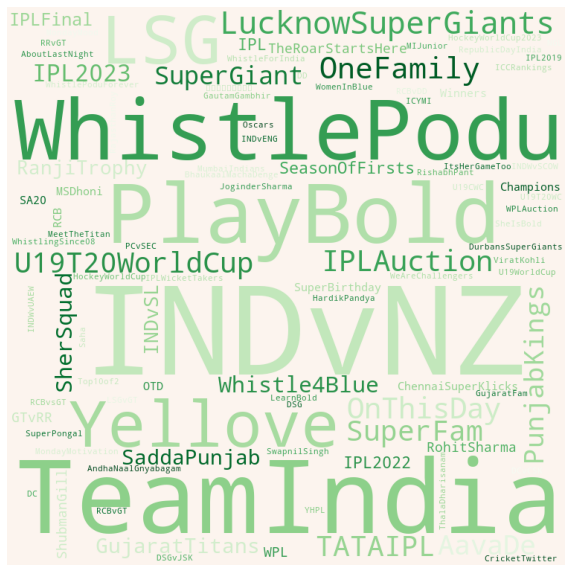

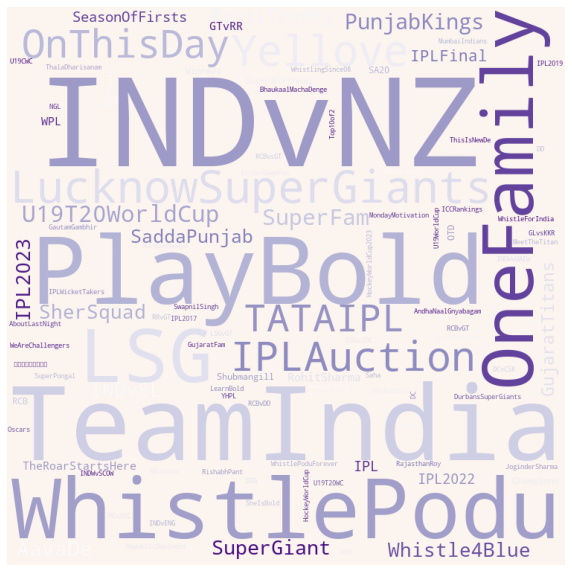

In [ ]:
for key in out.keys():
    pos_tags = data['text'][data[key]>0.2].apply(hashtag_extract)
    sentiment_tags=[]
    for tag in pos_tags:
        if tag!='':
            sentiment_tags.extend(tag)
    color={'neg':Reds,'pos':Greens,'neu':Greys,'compound':Purples}
    word_cloud(sentiment_tags,color[key])